In [550]:
%run scripts/python/standardize.py
%matplotlib inline

In [2]:
miami_pro = pd.read_json('https://opendata.miamidade.gov/resource/8u3a-jyk6.json?$limit=50000')

In [3]:
br_pro = pd.read_json('https://data.brla.gov/resource/wqnv-frwf.json?$limit=50000')

In [126]:
pd.options.display.max_columns = 45
miami_pro.head()

,amount,areacode,commodity,commodityname,country,createdate,linenumber,phone,phoneextension,ponumber,quantity,size,term1,term2,term3,term4,term5,term6,term7,term8,term9,unitcost,vendorlocation,vendorname,zipcode
0,71.64,NaN,670,"PLUMBING EQUIPMENT, FIXTURES, AND SUPPLIES",US,2017-01-17T00:00:00,1,NaN,NaN,POID1703628,1.0,EA,3/8 OD EZ CONNECT TEE LF QUICK (10 EA @ $6.23),NaN,NaN,CONTACT: NICK ROBULOCK 786-469-2711,NaN,NaN,NaN,NaN,NaN,62.30,"{'human_address': '{""address"":""PO BOX 680730"",...",LION PLUMBING SUPPLY INC,331680730.0
1,387.36,678.0,75,AUTOMOTIVE SHOP EQUIPMENT AND SUPPLIES,US,2017-01-11T00:00:00,1,421-5683,NaN,POAV1700817,144.0,EA,AUTOMOTIVE SHOP EQUIPMENT AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.69,"{'human_address': '{""address"":""PO BOX 409043"",...",GENUINE PARTS CO,303849043.0
2,351.44,305.0,615,"OFFICE SUPPLIES, GENERAL",US,2017-01-04T00:00:00,8,887-7339,NaN,POCC1700185,6.0,EA,DYLINE CORRECTION TAPE,ITEM # PAP87813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.95,"{'latitude': '25.846674', 'human_address': '{""...",J & E OFFICE SUPPLIES INC,331662221.0
3,2892.84,305.0,670,"PLUMBING EQUIPMENT, FIXTURES, AND SUPPLIES",US,2017-01-17T00:00:00,12,576-3054,NaN,POWS1705446,1.0,EA,"PLUMBING EQUIPMENT, FIXTURES,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.72,"{'latitude': '25.80383', 'human_address': '{""a...",LEHMAN PIPE & PLUMBING SUPPLY INC,33127.0
4,1240.00,NaN,98120,RENTAL OR LEASE OF CONSTRUCTION EQUIPMENT,US,2017-01-18T00:00:00,1,NaN,NaN,POMT1701644,1.0,EA,THIS PURCHASE ORDER IS CREATED TO PROCURE THE ...,DEPT. OF TRANSPORTATION AND PUBLIC WORKS FOR M...,FOR AN INVOICE FROM SUNBELT RENTALS FOR THE 1-...,STRAIGHT MAST FORKLIFT. THIS ACQUISITION WAS I...,FINALIZED BY TRACK AND GUIDEWAY.,NaN,INVOICE DATES: 12/12/2016 TO 1/08/2017 ...,NaN,EQUIPMENT PART # ...,1240.00,"{'human_address': '{""address"":""PO BOX 409211"",...",SUNBELT RENTALS INC,30384.0


In [6]:
br_pro.head()

,cstctr,cstctr_desc,dept_desc,deptno,dt_qty_ord,dt_qty_um,dt_seq,dt_stock_desc,dt_tot_cost,dt_um_desc,...,vend_cont_name,vend_cont_ph_ext,vend_cont_phone,vend_cont_title,vend_minority_abbr,vend_minority_desc,vend_name_1,vend_name_2,vend_state,vend_zip
0,1200,LIBRARY BOARD OF CONTROL,LIBRARY BOARD OF CONTROL,12,NaN,NaN,NaN,NaN,NaN,NaN,...,JOHN E HIMES,NaN,2.149247e+09,REG SALES MGR,NaN,NaN,ENVISIONWARE INC,NaN,GA,30097
1,1200,LIBRARY BOARD OF CONTROL,LIBRARY BOARD OF CONTROL,12,1.0,EA,1.0,MAINTENANCE AND SUPPORT FOR THE LIBRARY'S ...,6119.25,EACH,...,JOHN E HIMES,NaN,2.149247e+09,REG SALES MGR,NaN,NaN,ENVISIONWARE INC,NaN,GA,30097
2,2010,CITY COURT-ADMINISTRATION,CITY COURT,20,NaN,NaN,NaN,NaN,NaN,NaN,...,CATHY FIELDS,NaN,8.002842e+09,ACCOUNTANT I,NON-M WBE,MINORITY TYPE - NON-MINORITY WBE,BI,BEHAVIORIAL INTERVENTIONS,CO,80301
3,2010,CITY COURT-ADMINISTRATION,CITY COURT,20,400.0,EA,1.0,HOMEGUARD 200 MONITORING SERVICE CHARGE (PER U...,940.00,EACH,...,CATHY FIELDS,NaN,8.002842e+09,ACCOUNTANT I,NON-M WBE,MINORITY TYPE - NON-MINORITY WBE,BI,BEHAVIORIAL INTERVENTIONS,CO,80301
4,2010,CITY COURT-ADMINISTRATION,CITY COURT,20,200.0,EA,2.0,HG206 HOMEGUARD DIGITAL CELL MONITORING SERVIC...,400.00,EACH,...,CATHY FIELDS,NaN,8.002842e+09,ACCOUNTANT I,NON-M WBE,MINORITY TYPE - NON-MINORITY WBE,BI,BEHAVIORIAL INTERVENTIONS,CO,80301


We will assume that input_date (baton rouge) and create_date (miami) are both associated with when the contract was awareded to the contractor 

In [24]:
wash_pro = pd.read_csv('Purchase_Orders_in_2017.csv')

In [25]:
wash_pro.head()

,PO_NUMBER,AGENCY_NAME,NIGP_DESCRIPTION,PO_TOTAL_AMOUNT,ORDER_DATE,SUPPLIER,FISCAL_YEAR,OBJECTID
0,PO556681,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,"2009230:COATS, CHEF'S, TWILL, 65% POLYESTER, 3...",259.00,2016-12-20T00:00:00.000Z,Imageone Uniforms,2017,307240
1,PO555053,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,"SUPPLIES, SCHOOL, VARIOUS (NOT OTHERWISE CLASS...",139.11,2016-11-22T00:00:00.000Z,AMERICAN EXPRESS COMPANY,2017,307241
2,PO555053,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,"SUPPLIES, SCHOOL, VARIOUS (NOT OTHERWISE CLASS...",9.53,2016-11-22T00:00:00.000Z,AMERICAN EXPRESS COMPANY,2017,307242
3,PO554803,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,Janitorial Management Services,78.04,2016-11-18T00:00:00.000Z,General Merchandise Supplies,2017,307243
4,PO555102-V2,OFFICE OF ADMINISTRATIVE HEARINGS,POSTAGE STAMPS,30000.00,2016-12-06T00:00:00.000Z,PITNEY BOWES,2017,307244


The Washington dataset is for purchase orders greater than $25000

In [26]:
wash_pro.columns

Index(['PO_NUMBER', 'AGENCY_NAME', 'NIGP_DESCRIPTION', 'PO_TOTAL_AMOUNT',
       'ORDER_DATE', 'SUPPLIER', 'FISCAL_YEAR', 'OBJECTID'],
      dtype='object')

In [27]:
miami_pro.columns

Index(['amount', 'areacode', 'commodity', 'commodityname', 'country',
       'createdate', 'linenumber', 'phone', 'phoneextension', 'ponumber',
       'quantity', 'size', 'term1', 'term2', 'term3', 'term4', 'term5',
       'term6', 'term7', 'term8', 'term9', 'unitcost', 'vendorlocation',
       'vendorname', 'zipcode'],
      dtype='object')

In [28]:
br_pro.columns

Index(['cstctr', 'cstctr_desc', 'dept_desc', 'deptno', 'dt_qty_ord',
       'dt_qty_um', 'dt_seq', 'dt_stock_desc', 'dt_tot_cost', 'dt_um_desc',
       'dt_unit_cost', 'empl_inp', 'po_balance', 'po_category',
       'po_category_desc', 'po_in_date', 'po_num', 'po_stat', 'po_stat_desc',
       'po_type_cd', 'po_type_desc', 'purc_agent', 'rec_type', 'req_num',
       'total_amt', 'total_items', 'unique_id', 'vchd_amt', 'vend',
       'vend_addr_1', 'vend_addr_2', 'vend_city', 'vend_cont_name',
       'vend_cont_ph_ext', 'vend_cont_phone', 'vend_cont_title',
       'vend_minority_abbr', 'vend_minority_desc', 'vend_name_1',
       'vend_name_2', 'vend_state', 'vend_zip'],
      dtype='object')

In [118]:
br_pro = br_pro[['unique_id','dt_stock_desc','po_num','po_in_date','po_stat','dt_qty_ord','dt_unit_cost','total_amt','vend_name_1',
       'vend_name_2', 'vend_state', 'vend_zip','vend',
       'vend_addr_1', 'vend_addr_2', 'vend_city','vend_cont_phone','dept_desc']]

In [119]:
br_pro['vendorname'] = br_pro[['vend_name_1','vend_name_2']].apply(lambda x: combine_cols(x),axis=1)

In [131]:
br_pro_less = br_pro[['dt_stock_desc','po_in_date','vendorname','total_amt']].rename(columns={
    'dt_stock_desc':'commodity','po_in_date':'createdate','total_amt':'amount'})

In [158]:
miami_pro_less = miami_pro[['amount','commodityname','createdate','vendorname']].rename(columns={
    'commodityname':'commodity'})

In [149]:
wash_pro_less = wash_pro[['NIGP_DESCRIPTION', 'PO_TOTAL_AMOUNT','ORDER_DATE','SUPPLIER']].rename(columns={
    'NIGP_DESCRIPTION':'commodity',
    'ORDER_DATE':'createdate', 
    'PO_TOTAL_AMOUNT':'amount',
    'SUPPLIER':'vendorname'})

In [123]:
check_na(br_pro_less)

value,False,True
variable,,
dept_desc,4224,0
dt_stock_desc,3161,1063
po_in_date,4224,0
po_num,4224,0
total_amt,4224,0
unique_id,4224,0
vendorname,4224,0


In [152]:
def describe_all(dfs):
    for idx,df in enumerate(dfs):
        print(idx)
        print(df.describe())

In [162]:
miami_pro_less.commodity.value_counts()

AUTOMOTIVE MAINTENANCE ITEMS AND        REPAIR/REP    4490
PLUMBING EQUIPMENT, FIXTURES, AND       SUPPLIES      3137
ELECTRICAL EQUIPMENT AND SUPPLIES       (EXCEPT CA    3111
HAND TOOLS (POWERED AND NON-POWERED),   ACCESSORIE    1704
UNIFORMS, COTTON, BLENDS AND SYNTHETIC: BAND, FIRE    1486
SALE OF BUILDERS SUPPLIES                             1151
BOOTS, LEATHER                                         967
MOTORS AND PARTS, FRACTIONAL H.P.       ELECTRIC       825
AIR CONDITIONERS: COMMERCIAL, AND PARTS AND ACCESS     785
OFFICE SUPPLIES, GENERAL                               722
FIRST AID AND SAFETY EQUIPMENT AND      SUPPLIES (     648
RECYCLED OFFICE SUPPLIES                               646
LABORATORY EQUIPMENT AND ACCESSORIES    (FOR GENER     542
PAINTS, USDA APPROVED                                  536
JANITORIAL AND CLEANING SUPPLIES                       532
MEASURING INSTRUMENTS, ANALOG AND       DIGITAL (F     523
HYDRAULIC SYSTEM COMPONENTS AND PARTS,  AUTOMOTIVE     5

In [163]:
br_pro_less.commodity.value_counts()

RFID DISC MEDIA UNLOCKING DEVICE                                                                                                                                                                                                                                13
ACCOUNTING CHANGES                                                                                                                                                                                                                                              12
EXTERIOR RFID CHECK IN SYSTEM WITH RECEIPT PRINTER AND LCD MONITOR                                                                                                                                                                                              12
STAFF CIRCULATION WORKSTATION WITH CONVERSION      SOFTWARE AND PAD                                                                                                                                                            

In [164]:
wash_pro_less.commodity.value_counts()

9182930:CONSULTING SERVICES RELATED TO THE IMPLEMENTATION OF SOFTWARE                                                                                        1335
EDUCATIONAL TRAINING CONSULTANT SERVICES                                                                                                                     1195
9615036:DEPOSITIONS AND EXPERT WITNESS TESTIMONY                                                                                                              949
9204520:MAINTENANCE AND LICENSE AGREEMENT SERVICES, MICROCOMPUTER SOFTWARE                                                                                    663
9620700:Arts Services (Cultural, Design, Visual, etc.)                                                                                                        637
SUPPLIES, SCHOOL, VARIOUS (NOT OTHERWISE CLASSIFIED)                                                                                                          601
Professional Services, Subco

In [151]:
br_pro_less.head()

,commodity,createdate,vendorname,amount
0,NaN,2017-07-17T00:00:00,ENVISIONWARE INC,6119.25
1,MAINTENANCE AND SUPPORT FOR THE LIBRARY'S ...,2017-07-17T00:00:00,ENVISIONWARE INC,6119.25
2,NaN,2017-07-17T00:00:00,BI BEHAVIORIAL INTERVENTIONS,1340.00
3,HOMEGUARD 200 MONITORING SERVICE CHARGE (PER U...,2017-07-17T00:00:00,BI BEHAVIORIAL INTERVENTIONS,1340.00
4,HG206 HOMEGUARD DIGITAL CELL MONITORING SERVIC...,2017-07-17T00:00:00,BI BEHAVIORIAL INTERVENTIONS,1340.00


In [154]:
wash_pro_less.head()

,commodity,amount,createdate,vendorname
0,"2009230:COATS, CHEF'S, TWILL, 65% POLYESTER, 3...",259.00,2016-12-20T00:00:00.000Z,Imageone Uniforms
1,"SUPPLIES, SCHOOL, VARIOUS (NOT OTHERWISE CLASS...",139.11,2016-11-22T00:00:00.000Z,AMERICAN EXPRESS COMPANY
2,"SUPPLIES, SCHOOL, VARIOUS (NOT OTHERWISE CLASS...",9.53,2016-11-22T00:00:00.000Z,AMERICAN EXPRESS COMPANY
3,Janitorial Management Services,78.04,2016-11-18T00:00:00.000Z,General Merchandise Supplies
4,POSTAGE STAMPS,30000.00,2016-12-06T00:00:00.000Z,PITNEY BOWES


In [155]:
miami_pro_less.head()

,amount,commodity,createdate,vendorname
0,71.64,670,2017-01-17T00:00:00,LION PLUMBING SUPPLY INC
1,387.36,75,2017-01-11T00:00:00,GENUINE PARTS CO
2,351.44,615,2017-01-04T00:00:00,J & E OFFICE SUPPLIES INC
3,2892.84,670,2017-01-17T00:00:00,LEHMAN PIPE & PLUMBING SUPPLY INC
4,1240.00,98120,2017-01-18T00:00:00,SUNBELT RENTALS INC


In [157]:
pd.concat([miami_pro_less,wash_pro_less,br_pro_less],axis=0)

,amount,commodity,createdate,vendorname
0,71.64,670,2017-01-17T00:00:00,LION PLUMBING SUPPLY INC
1,387.36,75,2017-01-11T00:00:00,GENUINE PARTS CO
2,351.44,615,2017-01-04T00:00:00,J & E OFFICE SUPPLIES INC
3,2892.84,670,2017-01-17T00:00:00,LEHMAN PIPE & PLUMBING SUPPLY INC
4,1240.00,98120,2017-01-18T00:00:00,SUNBELT RENTALS INC
5,3359.70,345,2017-01-23T00:00:00,SAFEWARE INC
6,188.80,3103,2017-01-27T00:00:00,W W GRAINGER INC
7,60.72,60,2017-01-17T00:00:00,GENUINE PARTS CO
8,7147.36,73054,2017-01-24T00:00:00,PRO-CO INC
9,447.39,6057,2017-01-05T00:00:00,AFFORDABLE AUTO & TRUCK GLASS INC


Could really use a data user guide for the categories that exist in these contracts datasets!

Create a master function downloading building permit data

In [502]:
permit_dfs = make_dfs('_data/blds.csv')

['Almeda', 'http://www.civicdata.com/api/3/action/datastore_search?resource_id=f148b5d2-b278-40ba-8ca4-945031d5994c', '', 48]
['Bernalillo', 'http://www.civicdata.com/api/3/action/datastore_search?resource_id=5a8094a3-9a68-46cd-95d0-c3b5b9d427ae', '', 47]
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=10000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=20000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=30000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=40000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=50000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=60000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=70000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=80000
https://data.cityofboston.gov/resource/fxsv-it4v.json?$limit=10000&$offset=90000
https://data.ci

Chattanooga has the fewest columns

In [505]:
def pick_dfs(permit_dfs):
    for city,df in permit_dfs.items():
        df.to_pickle('_data/pickles'+city+'.p')

In [592]:
permittypemapped_list = ['Building',
                        'Demolition',
                        'Electrical',
                        'Mechanical',
                        'Plumbing',
                        'Roof',
                        'Fence',
                        'Grading',
                        'Pool',
                        'Spa']

In [506]:
headers_dict, headers_dfs = get_same_cols(permit_dfs)

In [61]:
len(permit_dfs)

9

In [37]:
from jellyfish import jaro_winkler

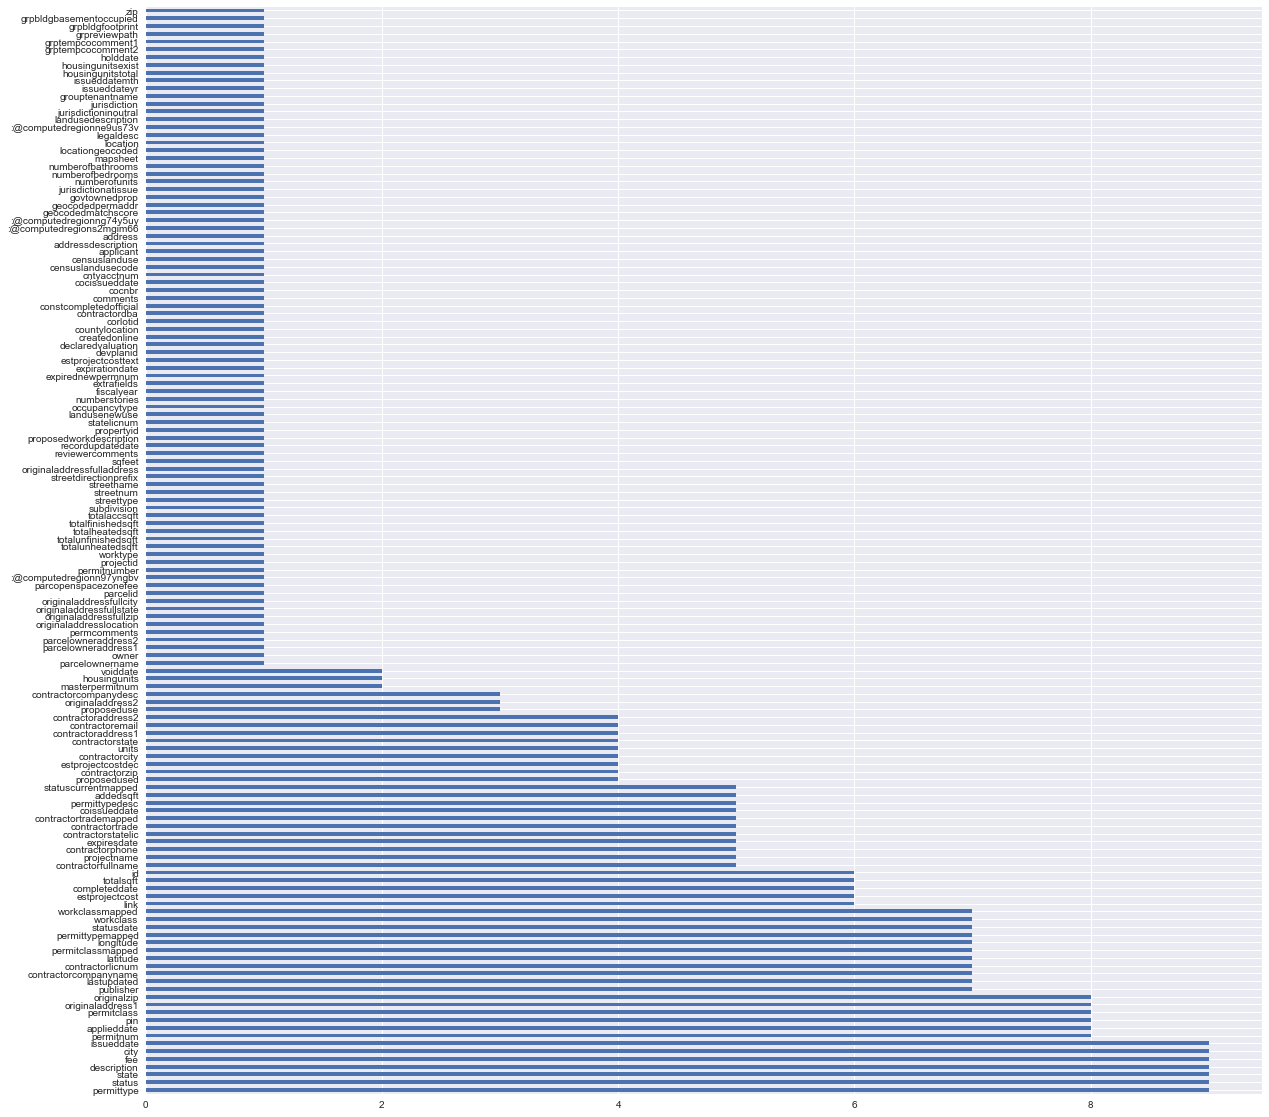

In [394]:
headers_dfs['count'].plot(kind='barh', figsize=(20,20))


Raleigh has coded address with each element separetly, but also has it in the more common format that other cities use.  In fact it seems like Raleigh has fields speifically for GeoJson

In [305]:
def no_chat(permit_dfs,series):
    for place in permit_dfs.keys():
        if place not in series:
            return True
        else:
            return False

headers_g6 = headers_dfs[headers_dfs['count']>= 6]
headers_g6 = headers_g6.reset_index()
headers_g6['field'] = headers_g6['index'] 

no_chat_series = headers_g6[headers_g6['count']>= 6].datasets.apply(lambda x: no_chat(permit_dfs,x))

I'm kind of not even sure how this works

In [306]:
headers_g6[no_chat_series].field

15            publisher
16    permitclassmapped
17     permittypemapped
19            longitude
21             latitude
22      workclassmapped
23            workclass
24                 link
25        completeddate
26                   id
27            totalsqft
Name: field, dtype: object

original
address location has lat long in it.

In [344]:
headers_dfs.head(1)

,count,datasets
issueddate,9,"[Almeda, Bernalillo, Boston, Chattanooga, Desc..."


In [340]:
check_na(permit_dfs['Chattanooga'])

value,False,True
variable,,
applieddate,1000,0
contractorcompanyname,929,71
contractorlicnum,929,71
contractorphone,743,257
description,995,5
estprojectcost,1000,0
fee,986,14
issueddate,960,40
lastupdated,878,122


There are many entries without lat long.  We are not focusing on lat long for this project, but for the sake of knowing that that most BLDS datasets will have lat long (hiding or not hiding) this was useful

In [395]:
headers_dfs

,count,datasets,missing
permittype,9,"[Almeda, Bernalillo, Boston, Chattanooga, Desc...",[]
status,9,"[Almeda, Bernalillo, Boston, Chattanooga, Desc...",[]
state,9,"[Almeda, Bernalillo, Boston, Chattanooga, Desc...",[]
description,9,"[Almeda, Bernalillo, Boston, Chattanooga, Desc...",[]
fee,9,"[Almeda, Bernalillo, Boston, Chattanooga, Desc...",[]
city,9,"[Almeda, Bernalillo, Boston, Chattanooga, Desc...",[]
issueddate,9,"[Almeda, Bernalillo, Boston, Chattanooga, Desc...",[]
permitnum,8,"[Almeda, Bernalillo, Chattanooga, Deschutes, R...",[Boston]
applieddate,8,"[Almeda, Bernalillo, Chattanooga, Deschutes, R...",[Boston]
pin,8,"[Almeda, Bernalillo, Chattanooga, Deschutes, R...",[Boston]


In [376]:
permit_dfs['Chattanooga'].head(1)

,applieddate,contractorcompanyname,contractorlicnum,contractorphone,description,estprojectcost,fee,issueddate,lastupdated,originaladdress1,originaladdresslocation,originalcity,originalstate,originalzip,permitclass,permitnum,permittype,pin,statuscurrent,statusdate,units
0,2009-02-10T00:00:00,OWNER,0000000,NaN,MAJOR REPAIRS TO EXISTING SINGLE FAMILY RESIDENCE,22500.0,150.0,2009-02-10T00:00:00,20090826.0,3501 04TH AVE,NaN,CHATTANOOGA,TN,37407.0,Building Permit,09-10159,Building/Building Permit/Residential (1-2 Unit...,033168A H 00200,Closed,2009-08-26T00:00:00,1


In [610]:
def get_permittypemapped(series,permittypemapped_list):
    #print(series)
    if type(series) == float:
        return float('nan')
    for pm_type in permittypemapped_list:
        pm_type_up = pm_type.upper()
        if pm_type_up in series.upper():
            return pm_type_up
    
permit_dfs['Chattanooga']['permittypemapped'] = permit_dfs['Chattanooga'].permittype.apply(lambda x: get_permittypemapped(x,permittypemapped_list))

In [607]:
permit_dfs['Boston'].head(1)

,address,applicant,city,comments,declaredvaluation,description,expirationdate,issueddate,location,occupancytype,owner,parcelid,permitnumber,permittype,propertyid,sqfeet,state,status,fee,worktype,zip,latitude,longitude,permittypemapped
0,160 Beacon ST,LANCE HOLMGREN,Boston,Installed heat pumps/central air conditioning,8000.0,Electrical,2010-07-04T00:00:00,2010-01-04T08:13:46,"{'latitude': '42.35473', 'human_address': '{""a...",Multi,ONE HUNDRED SIXTY BEACON ST,502592000.0,E2994,Electrical Permit,9703.0,0.0,MA,EXPIRED,21.0,ELECTRICAL,2116.0,42.35473,-71.07607,ELECTRICAL


In [611]:
permit_dfs['Boston']['permittypemapped'] = permit_dfs['Boston'].permittype.apply(lambda x: get_permittypemapped(x,permittypemapped_list))

In [613]:
permit_dfs['Boston']['permittypemapped'].value_counts()

ELECTRICAL    118430
PLUMBING       44408
Name: permittypemapped, dtype: int64

In [146]:
permit_dfs['Almeda'].head(1)

,addedsqft,applieddate,completeddate,contractoraddress1,contractoraddress2,contractorcity,contractorcompanydesc,contractorcompanyname,contractoremail,contractorfullname,contractorlicnum,contractorphone,contractorstate,contractorstatelic,contractortrade,contractortrademapped,contractorzip,createdonline,description,estprojectcost,estprojectcostdec,expiresdate,extrafields,fee,issueddate,lastupdated,latitude,link,longitude,originaladdress1,originaladdress2,originalcity,originalstate,originalzip,pin,permitclass,permitclassmapped,permitnum,permittype,permittypemapped,proposedused,publisher,statuscurrent,statuscurrentmapped,statusdate,workclass,workclassmapped,id
0,,2014-04-07,2014-04-10,27 LAVAGETTO COURT,,ALAMEDA,,SING SING CONSTRUCTION CO,KARENANDCHEE@HOTMAIL.COM,CHEE CHAN,519536,5104066151,CA,CA,CONTRACTOR,,94502,N,REMOVE &amp; REPLACE WATER HEATER (40 GALLONS...,500,500,2017-04-06,,123.73,2014-04-07,2014-04-10T16:23:26.000,,https://aca.accela.com/alameda/Cap/CapDetail.a...,,532 HAIGHT AVE,,ALAMEDA,CA,94501,074-0441-001-00,,,P14-0175,Plumbing - Over the Counter,Plumbing,,CITY OF ALAMEDA,FINALED,Permit Finaled,2014-04-10,434,Existing,4942


In [147]:
permit_dfs['Raleigh'].head(1)

,:@computedregionn97yngbv,:@computedregionne9us73v,:@computedregionng74y5uy,:@computedregions2mgim66,applieddate,censuslanduse,censuslandusecode,cntyacctnum,cocissueddate,cocnbr,coissueddate,constcompletedofficial,contractoraddress1,contractoraddress2,contractorcity,contractorcompanyname,contractordba,contractoremail,contractorlicnum,contractorphone,contractorstate,contractorzip,corlotid,countylocation,description,devplanid,estprojectcost,expirednewpermnum,expiresdate,fee,fiscalyear,geocodedmatchscore,geocodedpermaddr,govtownedprop,grouptenantname,grpbldgbasementoccupied,grpbldgfootprint,grpreviewpath,grptempcocomment1,grptempcocomment2,housingunitsexist,housingunitstotal,issueddate,issueddatemth,issueddateyr,jurisdiction,jurisdictionatissue,jurisdictioninoutral,landusedescription,landusenewuse,latitude,locationgeocoded,longitude,mapsheet,numberstories,originaladdress1,originaladdress2,originaladdressfulladdress,originaladdressfullcity,originaladdressfullstate,originaladdressfullzip,originalcity,originalstate,originalzip,parcopenspacezonefee,parcelowneraddress1,parcelowneraddress2,parcelownername,permcomments,permitclass,permitclassmapped,permitnum,permittype,permittypemapped,pin,projectname,proposeduse,proposedworkdescription,publisher,recordupdatedate,reviewercomments,statelicnum,statuscurrent,statuscurrentmapped,streetdirectionprefix,streetname,streetnum,streettype,totalsqft,voiddate,workclass,workclassmapped
0,4.0,11.0,NaN,28411.0,2007-01-02T00:00:00.000,ADDITION/ALTERATION NONRESIDENTIAL BLDG,437.0,243025.0,NaN,NaN,2007-02-23T00:00:00.000,Yes,2315 MYRON DRIVE SUITE 200,NaN,RALEIGH,VISION CONTRACTORS INC.,NaN,taylor@vci-nc.com,7227.0,9.197877e+09,NC,27607,0001,WAKE,INT ALTERATION APT SUNDAY DR 1511,8379.0,51672,NaN,NaN,78,FY 06/07,89.72,"{'type': 'Point', 'coordinates': [-78.729781, ...",0,PENDERGRASS LAW,0.0,20745.0,C,NaN,NaN,NaN,0.0,2007-01-30T00:00:00.000,1.0,2007.0,16000US3755000,RALEIGH,Inside City Limits,OFFICE PARK,923.0,35.799525,"{""x"":-78.7297809587235,""y"":35.7995246401638}",-78.729781,78409.0,3.0,1511 SUNDAY DR,220,1511 SUNDAY DR,RALEIGH,NC,27607.0,RALEIGH,NC,27607.0,3,NaN,NaN,"GRUBB, ELLIS, THOMAS LINDERMAN GRAH",EXPANSION OF SUITE,ADDITION/ALTERATION NONRESIDENTIAL BLDG,Non-Residential,62567,BUILDING,Building,NaN,ARENA CENTER OFFICE BUILDING SUBD,ADDITION/ALTERATION NONRESIDENTIAL BLDG,ALTERATION,City of Raleigh,2007-01-30T00:00:00.000,NaN,54353.0,INACTIVE (INSPECTIONS COMPLETED),Occupancy,NaN,SUNDAY,1511,DR,1342.0,NaN,Alterations/repairs,Existing


In [375]:
permit_dfs['Tampa'].head(1)

,addedsqft,applieddate,coissueddate,completeddate,contractoraddress1,contractoraddress2,contractorcity,contractorcompanydesc,contractorcompanyname,contractoremail,contractorfullname,contractorlicnum,contractorphone,contractorstate,contractorstatelic,contractortrade,contractortrademapped,contractorzip,description,estprojectcost,expiresdate,fee,housingunits,issueddate,latitude,longitude,lastupdated,link,masterpermitnum,originaladdress1,originalcity,originalstate,originalzip,pin,permitclass,permitclassmapped,permitnum,permittype,permittypedesc,permittypemapped,proposedused,publisher,statuscurrent,statuscurrentmapped,statusdate,totalsqft,workclass,workclassmapped,id
0,,2017-07-13,,,1800 W ASHTON BOULEVARD,500,LEHI,,VIVINT SOLAR DEVELOPER LLC,na,Cody Oram,973756,855 877-2974,UT,CA,CSLB Contractor,,84043,CROSS STREET: 14th ST \r\n\r\nDescription of W...,,,0,0,2017-07-13,33.036565512346193,-116.87326652268587,2017-07-14,https://publicservices.sdcounty.ca.gov/citizen...,,1395 LA HAINA ST,RAMONA,CA,92065,,Residential Alteration-Addn,Residential,PDS2017-RESALT-005662,Residential Alteration or Addition - Plan Chec...,8002 - REN - Solar Photovoltaic Roof Mount Res...,,CROSS STREET: 14th ST \n\nDescription of Work:...,San Diego - Prod 7.3.3.8.1,Issued,Permit Issued,2017-07-13,,Existing,Existing,81266


In [587]:
permit_dfs['Tampa'][['permittype','permittypemapped']].permittype.iloc[1]

'Residential Alteration or Addition - Plan Check-Permit'

It appears that permittype and permittypedescr/permittypedesc are often confused and could be the same or different depending on the dataset

In [588]:
permit_dfs['Boston']['permittypemapped'] = permit_dfs['Boston']['worktype']

In [614]:
agg_df = pd.DataFrame(columns=['permittypemapped','description','issueddate','fee','statuscurrent', 'city','state'])
for key,df in permit_dfs.items():
    agg_df = pd.concat([agg_df,df[['permittypemapped','description','issueddate','fee','status', 'city','state']]])

In [508]:
agg_df.state.value_counts()

MA    329507
NC    132028
TN     16053
OR       200
CA       190
FL       100
NM        99
AK        21
          11
SD         1
Name: state, dtype: int64

In [509]:
agg_df.head()

,city,description,fee,issueddate,permittype,state,status,statuscurrent
0,ALAMEDA,REMOVE &amp; REPLACE WATER HEATER (40 GALLONS...,123.73,2014-04-07,Plumbing - Over the Counter,CA,FINALED,NaN
1,ALAMEDA,UNIT #B: INSTALLATION OF AN EARTHQUAKE SHUT-O...,123.73,2014-04-07,Plumbing - Over the Counter,CA,FINALED,NaN
2,ALAMEDA,PARTIAL TEAR OFF &amp; RE-ROOF (CLASS 'A') A...,155.88,2012-12-10,Residential - Over the Counter,CA,FINALED,NaN
3,ALAMEDA,REPAIR OF WOOD SIDING (LIKE FOR LIKE),120.28,2012-08-21,Residential - Over the Counter,CA,FINALED,NaN
4,ALAMEDA,TEAR OFF AND RE-ROOF (CLASS 'A') INSTALL SPARK...,507.23,2013-09-17,Residential - Over the Counter,CA,FINALED,NaN


In [617]:
agg_df['issuedmonth']= agg_df.issueddate.apply(lambda x: pd.to_datetime(x).month)

In [618]:
agg_df['issuedyear']= agg_df.issueddate.apply(lambda x: pd.to_datetime(x).year)

In [640]:
agg_df['issuedday']= agg_df.issueddate.apply(lambda x: pd.to_datetime(x).day)

In [619]:
agg_df[agg_df.issuedyear >= 2010].state.value_counts()

MA    329507
NC     52117
TN     13525
CA       181
OR       176
NM        97
FL        91
AK        21
           7
Name: state, dtype: int64

In [512]:
year_by_state = agg_df.groupby(['state','issuedyear']).size().to_frame().reset_index().rename(columns={0:'yearcount'})

In [513]:
year_by_state[year_by_state.issuedyear < 2010]

,state,issuedyear,yearcount
10,FL,2006.0,1
11,FL,2007.0,1
28,NC,2000.0,5346
29,NC,2001.0,8017
30,NC,2002.0,8173
31,NC,2003.0,7868
32,NC,2004.0,9101
33,NC,2005.0,8966
34,NC,2006.0,9031
35,NC,2007.0,8924


In [620]:
agg_df_2010 = agg_df[agg_df.issuedyear >= 2010]

In [516]:
year_by_state['state_and_year'] = year_by_state.apply(lambda x:combine(x),axis=1)

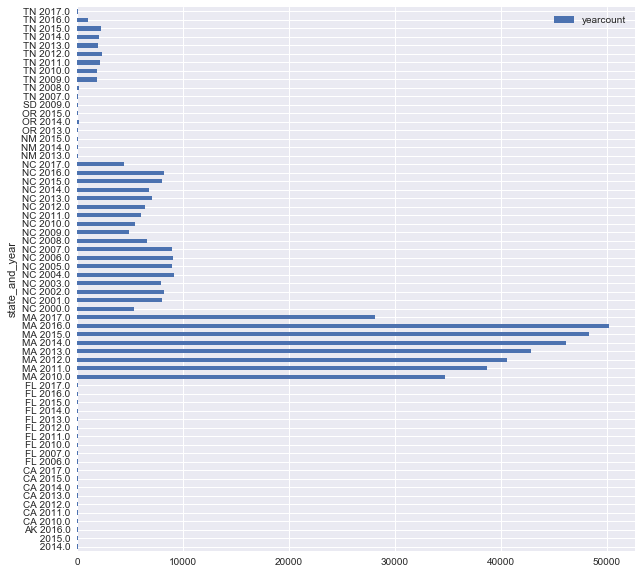

In [517]:
year_by_state.plot(kind='barh', x = 'state_and_year',y='yearcount', figsize=(10,10))

In [641]:
agg_df_2010.to_pickle('standardized_blds.p')

In [621]:
permitmapped_by_state = agg_df_2010.groupby(['state','permittypemapped']).size().to_frame().reset_index().rename(columns={0:'permit_count'})

In [622]:
permitmapped_by_state.head(1)

,state,permittypemapped,permit_count
0,,Building,3


In [626]:
def combine(series):
    print(series)
    return ' '.join([series[0].upper(),series[1]])
permitmapped_by_state['permit_and_state'] = permitmapped_by_state.apply(lambda x: combine(x),axis=1)

state                                  
permittypemapped               Building
permit_count                          3
permit_and_state     Commercial - Combo
Name: 0, dtype: object
state                                             
permittypemapped                        Electrical
permit_count                                     2
permit_and_state     Electrical - Over the Counter
Name: 1, dtype: object
state                                             
permittypemapped                        Mechanical
permit_count                                     2
permit_and_state     Mechanical - Over the Counter
Name: 2, dtype: object
state                                   AK
permittypemapped                DEMOLITION
permit_count                             2
permit_and_state     Mechanical Commercial
Name: 3, dtype: object
state                                 CA
permittypemapped                        
permit_count                           6
permit_and_state     Residential - Combo
Name

In [525]:
agg_df_2010.head(3)

,city,description,fee,issueddate,permittype,state,status,statuscurrent,issuedyear,issuedmonth
0,ALAMEDA,REMOVE &amp; REPLACE WATER HEATER (40 GALLONS...,123.73,2014-04-07,Plumbing - Over the Counter,CA,FINALED,NaN,2014.0,4.0
1,ALAMEDA,UNIT #B: INSTALLATION OF AN EARTHQUAKE SHUT-O...,123.73,2014-04-07,Plumbing - Over the Counter,CA,FINALED,NaN,2014.0,4.0
2,ALAMEDA,PARTIAL TEAR OFF &amp; RE-ROOF (CLASS 'A') A...,155.88,2012-12-10,Residential - Over the Counter,CA,FINALED,NaN,2012.0,12.0


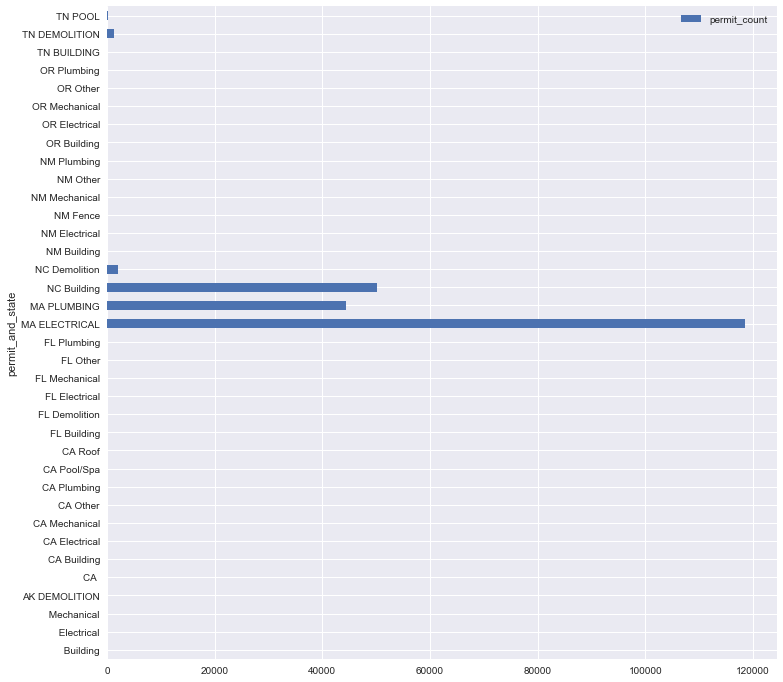

In [627]:
permitmapped_by_state.plot(kind = 'barh', x = 'permit_and_state', y='permit_count', figsize=(12,12))

Lets get a better understanding of the distrubtion of field values!

In [577]:
state_list = ['Almeda',
 'Bernalillo',
 'Boston',
 'Chattanooga',
 'Deschutes',
 'Raleigh',
 'San Diego',
 'Seattle',
 'Tampa']

In [ ]:
sem_dict = semantic_compare(permit_by_state,state_list)

In [615]:
compare_permittype_vals = pd.DataFrame(sem_dict).transpose()

Here is where we can employ some edit distance function to find similar permit types to find similar permit types.  This is not without a careful look at the given fields

In [ ]:
def not_null_then_upper(series):
    if series == None:
        return float('nan')
    else:
        return series.upper()
    
agg_df_2010['permittypemapped'] = agg_df_2010.permittypemapped.apply(lambda x: not_null_then_upper(x))

,city,description,fee,issueddate,permittypemapped,state,status,statuscurrent,issuedmonth,issuedyear
0,ALAMEDA,REMOVE &amp; REPLACE WATER HEATER (40 GALLONS...,123.73,2014-04-07,PLUMBING,CA,FINALED,NaN,4.0,2014.0
1,ALAMEDA,UNIT #B: INSTALLATION OF AN EARTHQUAKE SHUT-O...,123.73,2014-04-07,PLUMBING,CA,FINALED,NaN,4.0,2014.0
2,ALAMEDA,PARTIAL TEAR OFF &amp; RE-ROOF (CLASS 'A') A...,155.88,2012-12-10,BUILDING,CA,FINALED,NaN,12.0,2012.0
3,ALAMEDA,REPAIR OF WOOD SIDING (LIKE FOR LIKE),120.28,2012-08-21,BUILDING,CA,FINALED,NaN,8.0,2012.0
4,ALAMEDA,TEAR OFF AND RE-ROOF (CLASS 'A') INSTALL SPARK...,507.23,2013-09-17,BUILDING,CA,FINALED,NaN,9.0,2013.0
5,ALAMEDA,Removal and replacement of the existing Tar an...,230.63,2014-01-07,ROOF,CA,ISSUED,NaN,1.0,2014.0
6,ALAMEDA,RE-INSTALL POWER DUE TO DRYER VENT FIRE,0,2014-04-10,ELECTRICAL,,FINALED,NaN,4.0,2014.0
7,ALAMEDA,REPLACEMENT OF FURNACE LIKE FOR LIKE.,115.25,2015-07-24,MECHANICAL,CA,ISSUED,NaN,7.0,2015.0
10,ALAMEDA,SEWER LATERAL TEST W/EXISTING TWO WAY KELLY,198.6,2014-04-09,OTHER,CA,FINALED,NaN,4.0,2014.0
11,ALAMEDA,"TERMITE REPAIR ITEMS #13, 21, 22, 26, &amp; 27...",716.69,2015-07-14,BUILDING,CA,ISSUED,NaN,7.0,2015.0


In [649]:
agg_df_2010['state']=agg_df_2010.state.fillna('TN')

/Users/summerfellow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [652]:
agg_df_2010.to_csv('_data/standardized_blds.csv')

In [650]:
check_na(agg_df_2010)

value,False,True
variable,,
city,389591,8030
description,393434,4187
fee,397610,11
issueddate,397621,0
issuedmonth,397621,0
issuedyear,397621,0
permittypemapped,217192,180429
state,397621,0
status,397621,0
